In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
df= pd.read_csv('Churn_Modelling.csv')

In [77]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [79]:
X=df

In [80]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1 , inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
y = df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
X.drop('Exited',axis=1,inplace=True)


In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [13]:
s=pd.get_dummies(X['Geography'],drop_first=True)
s.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [14]:
e= pd.get_dummies(X['Gender'],drop_first=True)
e.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [15]:
X=pd.concat([X,s,e],axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [16]:
X.drop(['Geography','Gender'],axis=1 ,inplace=True)

In [17]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Germany          10000 non-null  uint8  
 9   Spain            10000 non-null  uint8  
 10  Male             10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 ,random_state=0)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss=StandardScaler()

In [23]:
X_train=ss.fit_transform(X_train)

In [24]:
X_test = ss.fit_transform(X_test)

In [25]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [26]:
X_test

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [27]:
#Part 2 Lets make the ANN

In [28]:
#Importing the Keras libraries and packages

In [29]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [30]:
import tensorflow as tf

In [31]:
type(tf)

module

In [32]:
import keras
from keras.models import Sequential # library responsible for cretaing Neural N
from keras.layers import Dense# hidden kayers creation
from keras.layers import LeakyReLU
from keras.layers import Dropout

In [33]:
classifier = Sequential()

In [34]:
#LAyer 1

In [35]:
classifier.add(Dense(units=6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim =11))

In [36]:
classifier.add(Dropout(0.3)) #apply only for deep neural n/w

In [37]:
#unit=6 6 hidden neurons
#kernel_initializer = 'he_uniform' is weight initializer
#input_dim =11 how many input layers are connected to hidden neurons 

In [38]:
#LAyer 2 all hiddebn layer should have RelLU or LEAKY RELU

In [39]:
classifier.add(Dense(units=6, kernel_initializer = 'he_uniform', activation = 'relu'))

In [40]:
classifier.add(Dropout(0.4)) 

In [41]:
# OUTPUT LAYER

In [42]:
classifier.add(Dense(units=1, kernel_initializer = 'glorot_uniform', activation ='sigmoid' ))

In [43]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [44]:
#compliling ANN

In [45]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [46]:
#fitting the ANN to training set

In [47]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33 ,batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 7s 6ms/step - loss: 0.7004 - accuracy: 0.7065 - val_loss: 0.5402 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5546 - accuracy: 0.7910 - val_loss: 0.5062 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5208 - accuracy: 0.7949 - val_loss: 0.4913 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5018 - accuracy: 0.7959 - val_loss: 0.4777 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4972 - accuracy: 0.7962 - val_loss: 0.4737 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4845 - accuracy: 0.7962 - val_loss: 0.4661 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4795 - accuracy: 0.7962 - val_loss: 0.4602 - val_accuracy: 0.7955

Epoch 58/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4094 - accuracy: 0.8337 - val_loss: 0.3829 - val_accuracy: 0.8398
Epoch 59/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4038 - accuracy: 0.8337 - val_loss: 0.3797 - val_accuracy: 0.8421
Epoch 60/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4114 - accuracy: 0.8311 - val_loss: 0.3808 - val_accuracy: 0.8440
Epoch 61/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4068 - accuracy: 0.8334 - val_loss: 0.3826 - val_accuracy: 0.8402
Epoch 62/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4124 - accuracy: 0.8336 - val_loss: 0.3841 - val_accuracy: 0.8402
Epoch 63/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4054 - accuracy: 0.8356 - val_loss: 0.3829 - val_accuracy: 0.8398
Epoch 64/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4075 - accuracy: 0.8306 - val_loss: 0.3793 - val_accuracy:

In [55]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epoch')

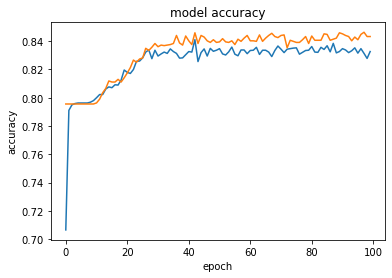

In [49]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [50]:
y_pred = classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [51]:
from sklearn.metrics import confusion_matrix ,accuracy_score

In [52]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[1584,   11],
       [ 279,  126]], dtype=int64)

In [53]:
score = accuracy_score(y_pred,y_test)
score

0.855